In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv('data/results.csv', usecols=['company_name', 'time', 'salary', 'title', 'link'], index_col=['company_name', 'time'], na_values=['EMPTY'])

In [41]:
df = df.sort_values(['company_name', 'time'], inplace=False)

In [42]:
df.to_csv('results.csv')

In [43]:
df1 = pd.read_csv('data/results.csv', na_values=['EMPTY'])

In [44]:
df1

,id,time,company_name,salary,location,title,link
0,442,72,Ambercare24,NaN,Niemcy,OPIEKUNKA DO PANA W ŚREDNIM WIEKU! WYJAZD OD 2...,https://pl.jooble.org/desc/4020778464239979433...
1,443,72,pracownik6,NaN,Niemcy,SUPER OFERTA! OPIEKUNKA DO MOBILNEGO SENIORA! ...,https://pl.jooble.org/desc/6641658086680284766...
2,444,72,Opieka Portus,1550 €,Niemcy,Opiekunka z komunikatywną znajomością języka n...,https://pl.jooble.org/desc/-710463964859341466...
3,445,48,Senihelp24,NaN,Niemcy,Wyrozumiała opiekunka z dobrym niemieckim,https://pl.jooble.org/desc/-689319377588630428...
4,446,48,Ambercare24,NaN,Niemcy,SUPER OFERTA! OPIEKUNKA DO MOBILNEGO SENIORA! ...,https://pl.jooble.org/desc/-495170756048159331...
...,...,...,...,...,...,...,...
426,154,120,APNDeiNL,NaN,Niemcy,APN - Opiekun/ka osób starszych Hemau / Niemcy,https://pl.jooble.org/desc/-470291251619226492...
427,155,144,omegacdk,NaN,Niemcy,Opieka od 17.09. okolice Lipska/1600EURO netto...,https://pl.jooble.org/desc/5299088147663384216...
428,156,120,APNDeiNL,NaN,Niemcy,APN - Opiekun/ka osób starszych Grunberg - Lar...,https://pl.jooble.org/desc/-753828613450483802...
429,159,144,ABC Work,NaN,Niemcy,Opiekun/ka osób starszych - dom opieki - Niemc...,https://pl.jooble.org/desc/6084610435952777072...


In [45]:
df1.time.value_counts() / df1.time.count()

120    0.215777
72     0.204176
48     0.174014
144    0.171694
96     0.148492
24     0.025522
18     0.018561
168    0.013921
17     0.011601
23     0.006961
20     0.002320
15     0.002320
11     0.002320
5      0.002320
Name: time, dtype: float64

In [46]:
sum(df1.time < 24)/ df1.time.count()

0.04640371229698376

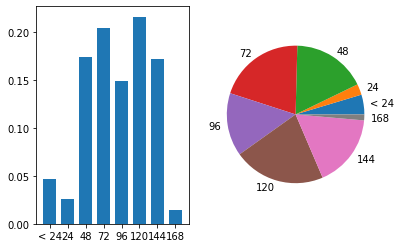

In [47]:
procenty = [0.046403, 0.025522, 0.174014, 0.204176, 0.148492, 0.215777, 0.171694, 0.013921]
odp = ["< 24", "24", "48", "72", "96", "120", "144", "168"]
fig = plt.figure()
plt.subplot(1,2,1)
x = np.arange(len(procenty))
s = 0.7
plt.bar(x,procenty,s)
plt.xticks(x,odp, rotation = 0)
plt.subplot(1,2,2)
plt.pie(procenty,labels = odp)
plt.axis("equal")
fig.savefig('orders_per_day')

In [48]:
b = df1['company_name'].value_counts()

In [49]:
b.to_csv('group_by_number.csv')

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
